In [1]:
from pulp import *
import utils

In [2]:
WIDTH = 0
HEIGHT = 1

In [3]:
def run_LP(w, n, dims, rotation, break_symmetry):    
    upper_bound = sum(dims[:, HEIGHT])
    k = 4
    prob = LpProblem("VLSI", LpMinimize)
    L = LpVariable("L", 0, upper_bound, LpInteger)
    pos_x = LpVariable.dicts("pos_x", range(n), 0, w, LpInteger)
    pos_y = LpVariable.dicts("pos_y", range(n), 0, upper_bound, LpInteger)
    M0 = M1 = w
    M2 = M3 = upper_bound
    pos_chosen = LpVariable.dict("pos_chosen", (range(n), range(n), range(k)), 0, 1, LpInteger)
    rotated = LpVariable.dict("rotated", range(n), 0, 1, LpInteger)
    prob += L

    if rotation:
        for i in range(n):
            prob += L >= pos_y[i] + dims[i, HEIGHT]*(1-rotated[i])+ rotated[i]*dims[i, WIDTH]
            if break_symmetry and dims[i, HEIGHT] == dims[i, WIDTH]:
                # Break symmetry: Not allowed to rotate when it is a square
                prob += rotated[i] == 0
            for j in range(i + 1, n):
                prob += pos_x[i] + (1-rotated[i])*dims[i, WIDTH] + rotated[i]*dims[i, HEIGHT]<= pos_x[j] + M0 * (pos_chosen[i, j, 0])
                prob += pos_x[j] + (1-rotated[j])*dims[j, WIDTH] + rotated[j]*dims[j, HEIGHT] <= pos_x[i] + M1 * (pos_chosen[i, j, 1])
                prob += pos_y[i] + (1-rotated[i])*dims[i, HEIGHT] + rotated[i]*dims[i, WIDTH]<= pos_y[j] + M2 * (pos_chosen[i, j, 2])
                prob += pos_y[j] + (1-rotated[j])*dims[j, HEIGHT] + rotated[j]*dims[j, WIDTH]<= pos_y[i] + M3 * (pos_chosen[i, j, 3])
                prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= 3

        prob += pos_x[n-1] + (1-rotated[n-1])*dims[n-1, WIDTH] + rotated[n-1]*dims[n-1, HEIGHT] <= M1  

    if not rotation:
        for i in range(n):
            prob += L >= pos_y[i] + dims[i, HEIGHT]
            for j in range(i + 1, n):
                prob += pos_x[i] + dims[i, WIDTH] <= pos_x[j] + M0 * pos_chosen[i, j, 0]
                prob += pos_x[j] + dims[j, WIDTH] <= pos_x[i] + M1 * pos_chosen[i, j, 1]
                prob += pos_y[i] + dims[i, HEIGHT] <= pos_y[j] + M2 * pos_chosen[i, j, 2]
                prob += pos_y[j] + dims[j, HEIGHT] <= pos_y[i] + M3 * pos_chosen[i, j, 3]
                prob += lpSum([pos_chosen[i, j, k] for k in range(k)]) <= k - 1

    status = prob.solve()
    LpStatus[status]

    print(f"value of L: {value(L)}")
    sol = []
    sol.append([w, value(L)])
    sol.append([n])
    for i in range(n):
        print(i)
        
        width = dims[i, int(value(rotated[i]))]
        height = dims[i, 1-int(value(rotated[i]))]
        
        sol.append([width, height, int(value(pos_x[i])), int(value(pos_y[i]))])
        print(value(pos_x[i]), value(pos_y[i]))
    return sol, prob

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/2a99a09b2af342cca0511f2b956773d7-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/2a99a09b2af342cca0511f2b956773d7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 42 COLUMNS
At line 254 RHS
At line 292 BOUNDS
At line 330 ENDATA
Problem MODEL has 37 rows, 37 columns and 121 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 5 - 0.00 seconds
Cgl0002I 2 variables fixed
Cgl0004I processed model has 34 rows, 35 columns (35 integer (26 of which binary)) and 118 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 24 integers unsatisfied sum - 7.5
Cbc0038I Pass   1: suminf.    3.75000 (1

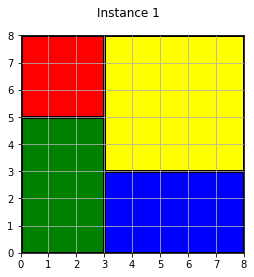

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/df5c8a8f3ed84f398569c24787ba5199-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/df5c8a8f3ed84f398569c24787ba5199-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 62 COLUMNS
At line 394 RHS
At line 452 BOUNDS
At line 509 ENDATA
Problem MODEL has 57 rows, 56 columns and 209 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3 - 0.00 seconds
Cgl0002I 1 variables fixed
Cgl0004I processed model has 56 rows, 55 columns (55 integer (44 of which binary)) and 208 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 36 integers unsatisfied sum - 8.44444
Cbc0038I Pass   1: suminf.    3.8888

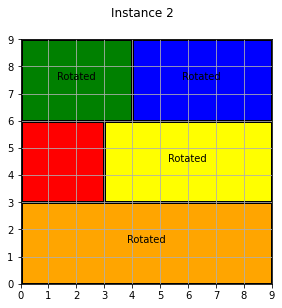

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/85a9c9a0032c41dfae404a2f762af06a-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/85a9c9a0032c41dfae404a2f762af06a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 89 COLUMNS
At line 571 RHS
At line 656 BOUNDS
At line 736 ENDATA
Problem MODEL has 84 rows, 79 columns and 300 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4 - 0.00 seconds
Cgl0002I 2 variables fixed
Cgl0004I processed model has 82 rows, 77 columns (77 integer (64 of which binary)) and 298 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 62 integers unsatisfied sum - 15.9167
Cbc0038I Pass   1: suminf.    5.6000

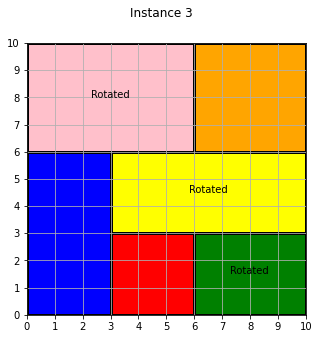

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /usr/local/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/955a97aec8ca484d876414ce32891b2e-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/t4/vnxj6kkj2n97knry5lnrscx00000gn/T/955a97aec8ca484d876414ce32891b2e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 119 COLUMNS
At line 777 RHS
At line 892 BOUNDS
At line 999 ENDATA
Problem MODEL has 114 rows, 106 columns and 431 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4 - 0.00 seconds
Cgl0002I 1 variables fixed
Cgl0004I processed model has 113 rows, 105 columns (105 integer (90 of which binary)) and 430 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0045I 1 integer variables out of 105 objects (105 integer) have cost of 1 - high priority


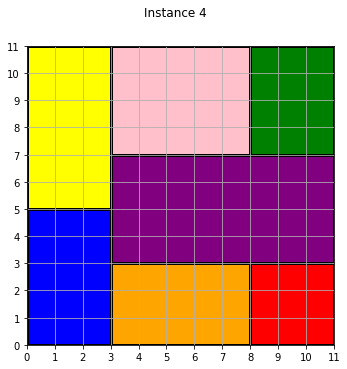

In [4]:
INSTANCE_NUMBER = 2
ALL_SOLUTIONS = False
ROTATION = True
BREAK_SYMMETRY  = True

solutions = []
for i in range(1,5):
    file_path = f"../instances/ins-{i}.txt"
    w, n, dims = utils.read_output(file_path)
    sol, prob = run_LP(w,n, dims, ROTATION, BREAK_SYMMETRY)
    v = utils.visualize_output(sol, dims, i)